# FOOOFing OMEGA Data

This notebook explores running FOOOF on MEG-PSD data.

In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt

from fooof import FOOOF, FOOOFGroup

from om.core.db import OMDB
from om.core.io import load_meg_psds

In [2]:
# Get database and path details from OMDB class
db = OMDB()

In [3]:
# Check available subject numbers for PSD files
sub_nums = db.check_dat_files('PSD', 'HCP')

In [4]:
# Check which PSD files haven't been FOOFed
psd_files, _ = db.check_dat_files('PSD', 'HCP', verbose=False)
fooof_files, _ = db.check_dat_files('fooof', 'HCP', verbose=False)

not_fooofed = []
for file in psd_files:
    if file not in fooof_files:
        not_fooofed.append(file)

print(str(len(not_fooofed)), 'Subject Files not yet FOOOFed: ')
print(not_fooofed)

0 Subject Files not yet FOOOFed: 
[]


## CHECK PSD DATA

In [5]:
# Load MEG Data
subj = 257845
#subj = 662551

psd, freqs = load_meg_psds('HCP', db.psd_path, subj)

In [6]:
# Check data - get number of PSDs and frequency resolution
[nPSDs, nFreqs] = np.shape(psd)
freq_res = np.mean(np.diff(freqs))
f_min = freqs.min()
f_max = freqs.max()
print('Number of PSDs is: ', nPSDs)
print('Frequency Resolution is: ', freq_res)
print('Frequency range is: ', f_min, ' to ', f_max)

Number of PSDs is:  7501
Frequency Resolution is:  0.48828125
Frequency range is:  0.0  to  500.0


In [7]:
# FOOOF SETTINGS
bw_lims = [1, 6]
max_n_peaks = 6
min_amp = 0.1

# Initialize FOOOF model
fm = FOOOF(peak_width_limits=bw_lims, max_n_peaks=max_n_peaks, min_peak_amplitude=min_amp)

In [8]:
freq_range = [2, 40]
cur_psd = psd[1000, :]

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                         -21.9826, 1.0722                                         
                                                                                                  
                                       5 peaks were found:                                        
          

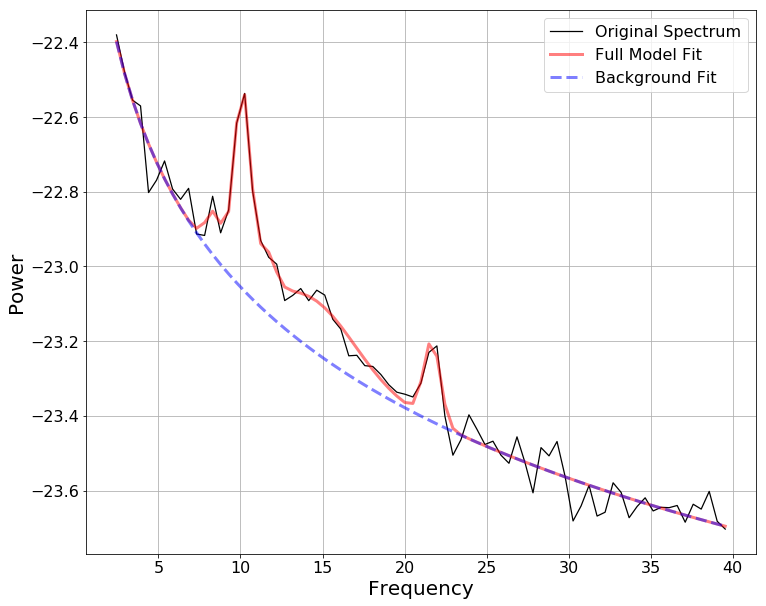

In [9]:
fm.report(freqs, cur_psd, freq_range, False)

## Check FOOOF Results

Load and check an MEG subjects FOOOF results that have already been run. 

In [10]:
# ToDo.